# Sprawozdanie 1
## Jakub Ciągło (275986), Mateusz Ćwiek (276011)

___
# Importy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import plot_likert
import random
import statistics
import warnings
import scipy.stats as stats
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.stats.proportion import proportion_confint, proportions_ztest

___
# Część 1
## Zadanie 1

___
**1. Przygotowanie danych do analizy**

W pierwszym etapie analizy danych dokonaliśmy wczytania pliku z danymi za pomocą funkcji `pd.read_csv()`, korzystając z odpowiedniego kodowania `Latin2` oraz separatora `;`, zgodnie z formatem pliku. Następnie przeprowadziliśmy wstępną inspekcję danych, wykorzystując metodę `info()`, która pozwoliła nam uzyskać podstawowe informacje o strukturze zbioru danych, takie jak liczba wierszy, liczba zmiennych oraz typy danych w poszczególnych kolumnach.

Kolejnym krokiem było sprawdzenie unikalnych wartości w każdej z kolumn za pomocą pętli, która dla każdej kolumny wyświetliła unikalne wartości. Dzięki temu mogliśmy szybko zweryfikować, czy wartości w danych są zgodne z oczekiwaniami, a także czy nie występują nieoczekiwane lub błędne wpisy.


In [1]:
df = pd.read_csv("ankieta.csv", encoding="Latin2", sep=";")

print("Informacje o danych:")
print(df.info())

print("\nUnikalne wartości w każdej kolumnie:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


NameError: name 'pd' is not defined

Dane zawierają 200 kompletnych obserwacji bez braków, typy zmiennych są zgodne z oczekiwaniami. Kolumna DZIAŁ obejmuje działy IT, PD, MK oraz HR, natomiast STAŻ oraz odpowiedzi na pytania PYT_1, PYT_2 i PYT_3 przyjmują wartości liczbowe zgodne z opisem. Zmienna CZY_KIER zawiera odpowiedzi „Tak” lub „Nie”, a płeć oznaczona jest jako M lub K. Wiek respondentów mieści się w zakresie od 25 do 67 lat, co wskazuje na brak nietypowych wartości. Dane można uznać za poprawne i gotowe do dalszej analizy.

___
**2. Kategoryzacja zmiennej WIEK**

W kolejnym etapie analizy, w celu uzyskania bardziej przystępnej reprezentacji danych, przeprowadziliśmy kategoryzację zmiennej **WIEK**. Zmienną **WIEK_KAT** utworzyliśmy, dzieląc dane na cztery przedziały wiekowe: do 35 lat, pomiędzy 36 a 45 lat, pomiędzy 46 a 55 lat, oraz powyżej 55 lat. Do tego celu wykorzystaliśmy funkcję `pd.cut()`, definiując odpowiednie przedziały za pomocą parametrów `bins` oraz przypisując etykiety przedziałom wiekowym w parametrze `labels`. Dodatkowo, ustawiliśmy parametr `right=True`, aby przedziały obejmowały górną granicę.

In [ ]:
df['WIEK_KAT'] = pd.cut(df['WIEK'], 
                        bins=[0, 35, 45, 55, float('inf')], 
                        labels=['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat'],
                        right=True)

print(df[['WIEK', 'WIEK_KAT']])

     WIEK        WIEK_KAT
0      64  powyżej 55 lat
1      67  powyżej 55 lat
2      65  powyżej 55 lat
3      68  powyżej 55 lat
4      65  powyżej 55 lat
..    ...             ...
195    42       36-45 lat
196    35       do 35 lat
197    39       36-45 lat
198    48       46-55 lat
199    42       36-45 lat

[200 rows x 2 columns]


___
**3. Tablica liczności dla zmiennych**

W kolejnym etapie analizy danych, sporządziliśmy tablice liczności dla zmiennych: **DZIAŁ**, **STAŻ**, **CZY_KIER**, **PŁEĆ**, oraz **WIEK_KAT**. Użyliśmy funkcji `value_counts()` do obliczenia liczby wystąpień poszczególnych wartości w każdej z tych zmiennych. Dla każdej z wymienionych zmiennych uzyskaliśmy tabelę przedstawiającą liczbę przypadków przypisanych do poszczególnych kategorii.

In [ ]:
zmienne = ['DZIAŁ', 'STAŻ', 'CZY_KIER', 'PŁEĆ', 'WIEK_KAT']

for zmienna in zmienne:
    print(f"\nTabela liczności dla {zmienna}:")
    print(df[zmienna].value_counts())


Tabela liczności dla DZIAŁ:
DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

Tabela liczności dla STAŻ:
STAŻ
2    140
1     41
3     19
Name: count, dtype: int64

Tabela liczności dla CZY_KIER:
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

Tabela liczności dla PŁEĆ:
PŁEĆ
M    129
K     71
Name: count, dtype: int64

Tabela liczności dla WIEK_KAT:
WIEK_KAT
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: count, dtype: int64


Najliczniej reprezentowanym działem jest PD (98 osób), a najmniej licznym IT (26 osób). Zdecydowana większość respondentów (140 osób) ma staż pracy oznaczony jako „2” (między jednym a trzema latami pracy). Tylko 27 osób zajmuje stanowiska kierownicze („Tak”). W grupie dominuje płeć męska (129 osób). Najliczniejszą grupą wiekową są osoby w przedziale 46-55 lat (45 osób), natomiast najmniej liczna grupa to osoby powyżej 55 lat (25 osób).

___
**4. Wykresy słupkowe i kołowe dla zmiennych PYT_1 oraz PYT_2**  

W tej części analizy sporządziliśmy wykresy słupkowe i kołowe dla zmiennych **PYT_1** oraz **PYT_2**, aby zobrazować rozkład odpowiedzi respondentów. Do wygenerowania wykresów wykorzystaliśmy metodę `value_counts()`, która pozwoliła określić liczność poszczególnych kategorii odpowiedzi. Wykres słupkowy został utworzony za pomocą `plt.bar()`, co umożliwiło porównanie częstości występowania odpowiedzi. Wykres kołowy wygenerowaliśmy przy użyciu `plt.pie()`, co pozwoliło przedstawić udział każdej kategorii w całości próby. 

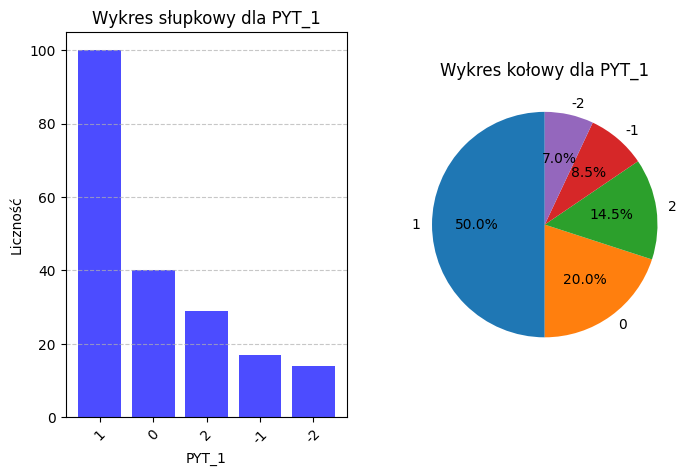

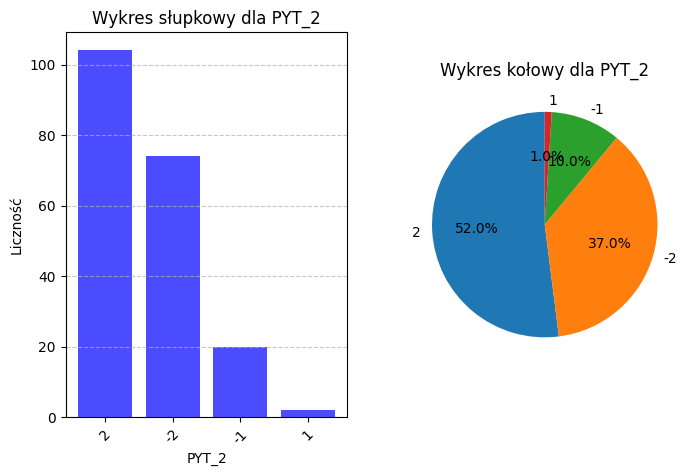

In [ ]:
pytania = ['PYT_1', 'PYT_2']

for pytanie in pytania:
    counts = df[pytanie].value_counts()

    plt.figure(figsize=(8, 5))
    plt.subplot(1,2,1)
    plt.bar(counts.index.astype(str), counts.values, color='blue', alpha=0.7)
    plt.xlabel(pytanie)
    plt.ylabel("Liczność")
    plt.title(f"Wykres słupkowy dla {pytanie}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1,2,2)
    plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
    plt.title(f"Wykres kołowy dla {pytanie}")
    plt.show()


Większość respondentów pozytywnie ocenia wsparcie i materiały zapewniane przez firmę umożliwiające skuteczne wykorzystanie wiedzy ze szkoleń (PYT_1). Połowa badanych zgadza się z tym stwierdzeniem, a kolejne 14,5% zdecydowanie się zgadza.  Neutralne stanowisko zajmuje 20%, a negatywnych opinii jest łącznie 15,5%. 

Natomiast w przypadku pytania PYT_2, dotyczącego dostosowania szkoleń do indywidualnych potrzeb i wsparcia rozwoju zawodowego oraz awansu, respondenci mają bardzo spolaryzowane opinie. Nieco ponad połowa ankietowanych (52%) zdecydowanie się zgadza ze stwierdzeniem, natomiast aż 47% wyraża niezadowolenie (z czego aż 37% zdecydowanie się nie zgadza, a 10% umiarkowanie). Pozostały 1% nie ma zdania. Wyniki te sugerują, że choć większość pracowników dostrzega pozytywny aspekt dostosowania szkoleń, istnieje jednak duża grupa, dla której te działania firmy nie spełniają oczekiwań.

___
**5. Tablice wielodzielcze dla wybranych par zmiennych**  

W tej części analizy sporządziliśmy tablice wielodzielcze dla par zmiennych: **PYT_1 i DZIAŁ**, **PYT_1 i STAŻ**, **PYT_1 i CZY_KIER**, **PYT_1 i PŁEĆ**, oraz **PYT_1 i WIEK_KAT**.  

Do utworzenia tabel zastosowaliśmy funkcję `pd.crosstab()`, która umożliwiła zestawienie liczności poszczególnych kategorii zmiennej **PYT_1** z kategoriami zmiennych towarzyszących. Dzięki temu możliwe było sprawdzenie, jak odpowiedzi na **PYT_1** są rozłożone w różnych grupach badanych.  

In [ ]:
pary_zmiennych = [('PYT_1', 'DZIAŁ'), 
                  ('PYT_1', 'STAŻ'), 
                  ('PYT_1', 'CZY_KIER'), 
                  ('PYT_1', 'PŁEĆ'), 
                  ('PYT_1', 'WIEK_KAT')]

for zmienna1, zmienna2 in pary_zmiennych:
    print(f"\nTabela wielodzielcza dla {zmienna1} i {zmienna2}:")
    tabela = pd.crosstab(df[zmienna1], df[zmienna2])
    print(tabela)



Tabela wielodzielcza dla PYT_1 i DZIAŁ:
DZIAŁ  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11

Tabela wielodzielcza dla PYT_1 i STAŻ:
STAŻ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2

Tabela wielodzielcza dla PYT_1 i CZY_KIER:
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2

Tabela wielodzielcza dla PYT_1 i PŁEĆ:
PŁEĆ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18

Tabela wielodzielcza dla PYT_1 i WIEK_KAT:
WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powyżej 55 lat
PYT_1                                                    
-2                1         11          2               0
-1                6          7          1               3
 0                3         24          5              

Oczywiście, zgodnie z wykresami słupkowymi i kołowymi, najwięcej odpowiedzi zawsze pada na wartość "1" (umiarkowana zgoda). Dział PD ma najwięcej pozytywnych ocen (łącznie 62 osoby wskazały odpowiedzi pozytywne: 51 umiarkowanie, 11 zdecydowanie). Najwięcej ocen negatywnych ("-2" i "-1") pojawia się także w dziale PD (łącznie 19 osób), ale jest to jednocześnie dział o największej liczebności, dlatego procentowo niekoniecznie musi być najbardziej krytyczny. W przypadku stażu pracy osoby ze stażem 1–3 lat udzielają najwięcej pozytywnych ocen (łącznie 99 osób), co może wynikać z faktu, że jest to najliczniejsza grupa (140 osób). Osoby niepełniące funkcji kierowniczych stanowią zdecydowaną większość (173 osoby), stąd też dominacja pozytywnych odpowiedzi ("1") jest tu szczególnie widoczna (88 osób). Biorąc pod uwagę płeć, zarówno kobiety, jak i mężczyźni najczęściej udzielają odpowiedzi pozytywnych, jednak mężczyźni są znacznie liczniejszą grupą. Z kolei analiza wieku wskazuje, że najwięcej pozytywnych opinii pochodzi od osób w przedziale 36–45 lat (łącznie 62 osoby). Najbardziej krytyczne opinie ("-2") również najczęściej występują w tej grupie wiekowej (11 osób), co wynika także z dużej liczebności tej grupy. 

___
**6. Tablica wielodzielcza dla zmiennych PYT_2 i PYT_3**  

W tej części analizy utworzyliśmy tablicę wielodzielczą dla zmiennych **PYT_2** i **PYT_3**. Do jej wygenerowania również zastosowaliśmy funkcję `pd.crosstab()`, która pozwoliła zestawić liczność poszczególnych kategorii odpowiedzi dla obu zmiennych.  


In [ ]:
tabela_6 = pd.crosstab(df['PYT_2'], df['PYT_3'])
print(tabela_6)

PYT_3  -2  -1   1   2
PYT_2                
-2     49  16   5   4
-1      3   6  10   1
 1      0   0   2   0
 2      0   8  15  81


Można zauważyć, że większość respondentów, którzy wcześniej wyrażali zdecydowanie pozytywną opinię (PYT_2 = 2), nadal utrzymuje ją po przeprowadzonych szkoleniach (81 z 104 osób). Spośród osób zdecydowanie niezadowolonych (PYT_2 = -2), większość pozostała negatywnie nastawiona (49 z 74 osób, czyli około 66%), lecz 9 osób (około 12%) zmieniło swoją opinię na pozytywną. Z kolei spośród respondentów umiarkowanie niezadowolonych (PYT_2 = -1), zmiana na pozytywną opinię była jeszcze bardziej widoczna – aż 11 z 20 osób (55%) oceniło szkolenia pozytywnie po ich zakończeniu. Wnioski wskazują, że cykl szkoleń był szczególnie skuteczny w przypadku osób umiarkowanie niezadowolonych, natomiast miał stosunkowo niewielki wpływ na najbardziej krytycznie nastawionych pracowników.

___
**7. Utworzenie zmiennej CZY_ZADOW na podstawie PYT_2**  

W tej części analizy utworzyliśmy nową zmienną **CZY_ZADOW**, która grupuje kategorie odpowiedzi z pytania **PYT_2**. Wartości **"nie zgadzam się"** oraz **"zdecydowanie się nie zgadzam"** zostały połączone w jedną kategorię **"niezadowolony"**, natomiast odpowiedzi **"zgadzam się"** i **"zdecydowanie się zgadzam"** zostały przypisane do kategorii **"zadowolony"**.  

Transformacji dokonaliśmy za pomocą metody `replace()`, przypisując nową kategorię do każdej z wartości w kolumnie **PYT_2**. 

In [ ]:
df['CZY_ZADOW'] = df['PYT_2'].replace({
    -2: 'niezadowolony',
    -1: 'niezadowolony',
     1: 'zadowolony',
     2: 'zadowolony'
})

print("\nUnikalne wartości w CZY_ZADOW:")
print(df['CZY_ZADOW'].value_counts())


Unikalne wartości w CZY_ZADOW:
CZY_ZADOW
zadowolony       106
niezadowolony     94
Name: count, dtype: int64


___
**8. Wykresy mozaikowe dla zmiennej CZY_ZADOW i wybranych cech demograficznych**  

W tej części analizy wygenerowaliśmy wykresy mozaikowe dla par zmiennych: **CZY_ZADOW i DZIAŁ**, **CZY_ZADOW i STAŻ**, **CZY_ZADOW i CZY_KIER**, **CZY_ZADOW i PŁEĆ**, oraz **CZY_ZADOW i WIEK_KAT**.  

Do wizualizacji użyliśmy funkcji `mosaic()`, która pozwala na przedstawienie współzależności między dwiema zmiennymi kategorycznymi. Wielkość poszczególnych prostokątów na wykresie odpowiada liczności kategorii w danych, co umożliwia ocenę proporcji oraz ewentualnych różnic między grupami.  

<Figure size 800x600 with 0 Axes>

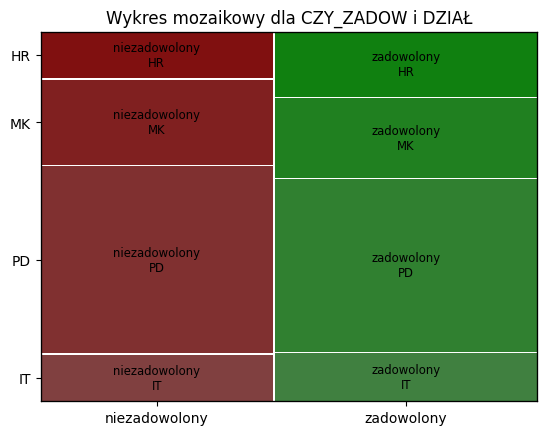

<Figure size 800x600 with 0 Axes>

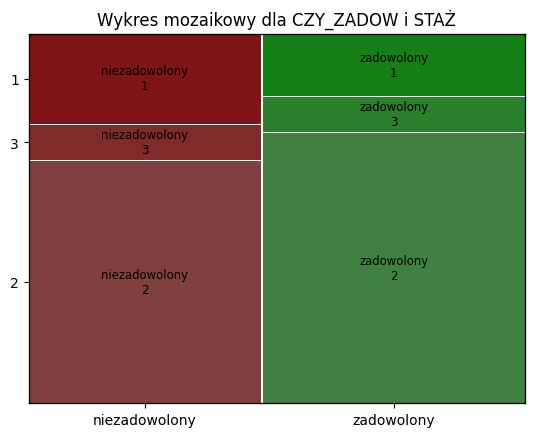

<Figure size 800x600 with 0 Axes>

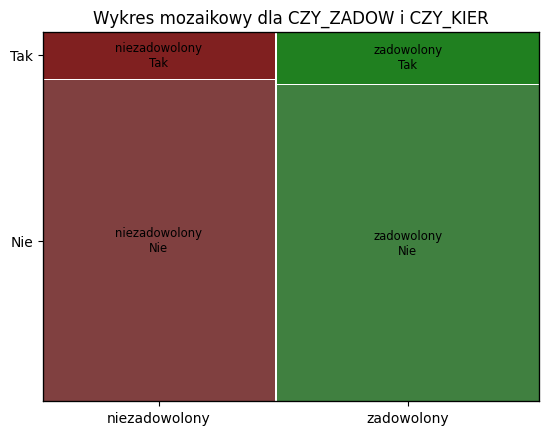

<Figure size 800x600 with 0 Axes>

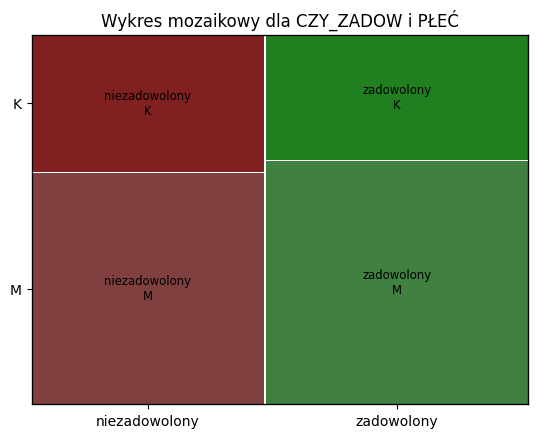

<Figure size 800x600 with 0 Axes>

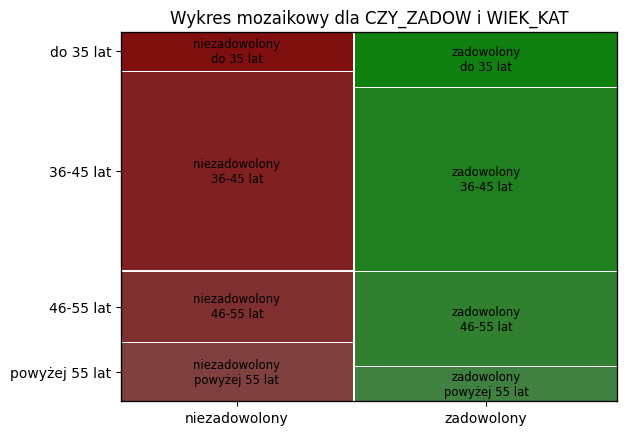

In [ ]:
pary_zmiennych = [('CZY_ZADOW', 'DZIAŁ'), 
                  ('CZY_ZADOW', 'STAŻ'), 
                  ('CZY_ZADOW', 'CZY_KIER'), 
                  ('CZY_ZADOW', 'PŁEĆ'), 
                  ('CZY_ZADOW', 'WIEK_KAT')]

for zmienna1, zmienna2 in pary_zmiennych:
    plt.figure(figsize=(8, 6))
    mosaic(df, [zmienna1, zmienna2], title=f"Wykres mozaikowy dla {zmienna1} i {zmienna2}")
    plt.show()

Można sformułować wstępne hipotezy o relacjach między zmienną „CZY_ZADOW” (zadowolenie) a pozostałymi zmiennymi (DZIAŁ, STAŻ, CZY_KIER, PŁEĆ, WIEK_KAT). Kilka przykładowych hipotez:

- Zależność od działu

Hipoteza: W niektórych działach (np. PD) odsetek osób zadowolonych jest wyższy niż w innych (np. HR). Można przypuszczać, że specyfika pracy w danym dziale wpływa na poziom zadowolenia ze szkoleń.

- Zależność od stażu 

Hipoteza: Pracownicy o dłuższym stażu (kategorie 2 i 3) częściej deklarują wyższe zadowolenie w porównaniu z osobami o stażu krótszym (1). Istnieje możliwość, że lepiej znają oni ofertę szkoleń albo są bardziej przywiązani do firmy.

- Zależność od funkcji kierowniczej

Hipoteza: Pełnienie funkcji kierowniczej (Tak) wiąże się z innym poziomem satysfakcji niż praca na stanowiskach niekierowniczych (Nie). Możliwe, że menedżerowie mają dostęp do szkoleń wyższego poziomu lub oceniają je krytyczniej.

- Zależność od płci 

Hipoteza: Kobiety (K) i mężczyźni (M) mogą się różnić pod względem odsetka osób zadowolonych; przykładowo kobiety mogą częściej doceniać ofertę rozwojową, podczas gdy mężczyźni są bardziej niezadowoleni (lub odwrotnie).

- Zależność od wieku 

Hipoteza: Starsi pracownicy lub konkretne grupy wiekowe (np. 36–45 lat) mogą być bardziej (lub mniej) zadowoleni ze szkoleń w porównaniu z młodszymi (do 35 lat) lub najstarszymi (powyżej 55 lat).

___
# Część 2
## Zadanie 2 
**Wizualizacja odpowiedzi na pytanie PYT_1 w całej grupie oraz w podgrupach CZY_KIER**  

W tej części analizy zilustrowaliśmy odpowiedzi na pytanie **PYT_1**, zarówno w całej badanej grupie, jak i w podgrupach wyodrębnionych na podstawie zmiennej **CZY_KIER**.  
Najpierw dokonaliśmy mapowania wartości liczbowych zmiennej **PYT_1** na etykiety zgodne ze skalą Likerta, aby ułatwić interpretację wyników. Następnie obliczyliśmy liczność poszczególnych kategorii odpowiedzi w całej próbie oraz osobno dla kierowników i pracowników.  
Stworzyliśmy trzy tabele liczebności odpowiedzi oraz trzy wykresy:  
- dla całej grupy,  
- dla kierowników,  
- dla pracowników.  

Liczebność odpowiedzi PYT_1 w całej grupie:
PYT_1_LIKERT
Zdecydowanie się nie zgadzam     14
Nie zgadzam się                  17
Nie mam zdania                   40
Zgadzam się                     100
Zdecydowanie się zgadzam         29
Name: count, dtype: int64
--------------------------------------------------
Liczebność odpowiedzi PYT_1 - Kierownicy:
PYT_1_LIKERT
Zdecydowanie się nie zgadzam     4
Nie zgadzam się                  3
Nie mam zdania                   6
Zgadzam się                     12
Zdecydowanie się zgadzam         2
Name: count, dtype: int64
--------------------------------------------------
Liczebność odpowiedzi PYT_1 - Pracownicy:
PYT_1_LIKERT
Zdecydowanie się nie zgadzam    10
Nie zgadzam się                 14
Nie mam zdania                  34
Zgadzam się                     88
Zdecydowanie się zgadzam        27
Name: count, dtype: int64
--------------------------------------------------


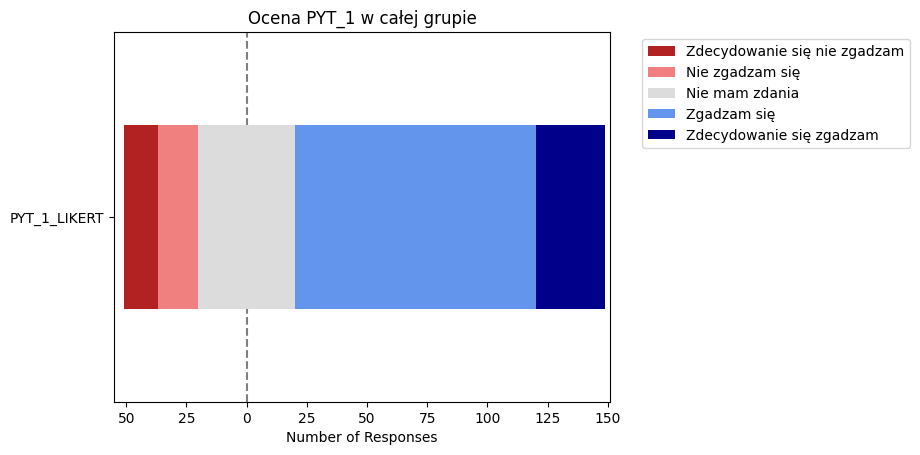

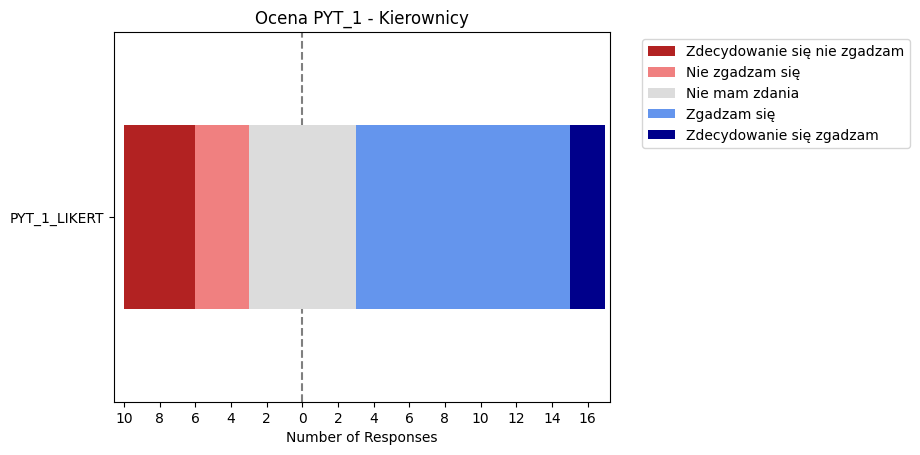

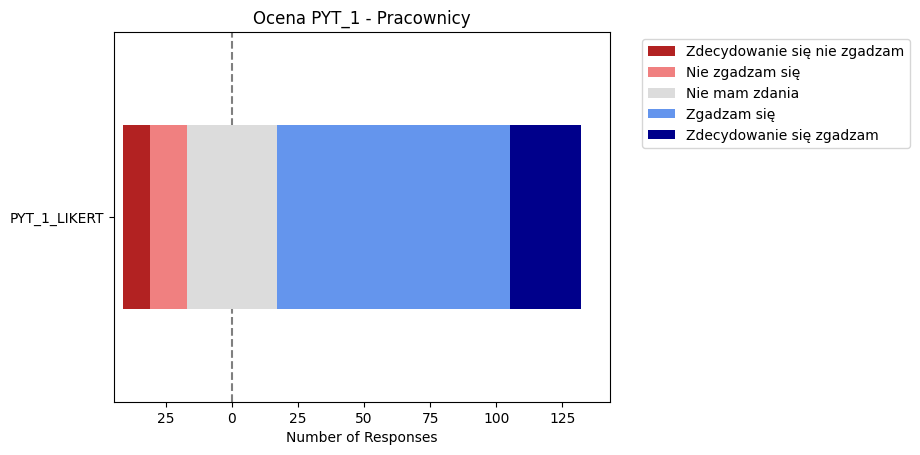

In [ ]:
likert_scale = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
     0: "Nie mam zdania",
     1: "Zgadzam się",
     2: "Zdecydowanie się zgadzam"
}
scale = [
    "Zdecydowanie się nie zgadzam",
    "Nie zgadzam się",
    "Nie mam zdania",
    "Zgadzam się",
    "Zdecydowanie się zgadzam"
]


df["PYT_1_LIKERT"] = df["PYT_1"].map(likert_scale)

table_all = df["PYT_1_LIKERT"].value_counts().reindex(scale)
print("Liczebność odpowiedzi PYT_1 w całej grupie:")
print(table_all)
print("-"*50)

subset_kier = df[df["CZY_KIER"] == "Tak"]
table_kier = subset_kier["PYT_1_LIKERT"].value_counts().reindex(scale)
print("Liczebność odpowiedzi PYT_1 - Kierownicy:")
print(table_kier)
print("-"*50)

subset_niekier = df[df["CZY_KIER"] == "Nie"]
table_niekier = subset_niekier["PYT_1_LIKERT"].value_counts().reindex(scale)
print("Liczebność odpowiedzi PYT_1 - Pracownicy:")
print(table_niekier)
print("-"*50)

plot_likert.plot_likert(
    df[["PYT_1_LIKERT"]],
    plot_scale=scale,
    title="Ocena PYT_1 w całej grupie"
)
plt.show()

plot_likert.plot_likert(
    subset_kier[["PYT_1_LIKERT"]],
    plot_scale=scale,
    title="Ocena PYT_1 - Kierownicy"
)
plt.show()

plot_likert.plot_likert(
    subset_niekier[["PYT_1_LIKERT"]],
    plot_scale=scale,
    title="Ocena PYT_1 - Pracownicy"
)
plt.show()

Na podstawie przedstawionych wyników (także wcześniejszych wykresów kołowego i słupkowego) można zauważyć, że w całej grupie dominują odpowiedzi „Zgadzam się” (100 osób) oraz „Nie mam zdania” (40 osób). W porównaniu do ogólnej grupy, wśród kierowników, rzecz jasna, widać wyraźnie mniejszą liczebność odpowiedzi, są one także bardziej skoncentrowane w kategoriach „Zgadzam się” i „Nie mam zdania”, przy czym w tej grupie zauważalny jest stosunkowo większy odsetek osób, które nie zgadzają się z twierdzeniem lub nie mają wyraźnego zdania (łącznie 13 osób na 27).

W przypadku pracowników, zauważalnie większy jest udział osób, które „Zgadzają się” (88 osób) oraz „Zdecydowanie się zgadzają” (27 osób). Pracownicy wydają się być w dużej mierze pozytywnie nastawieni do oceny wsparcia i materiałów szkoleniowych w firmie.

Różnice między grupami mogą sugerować, że pracownicy niepełniący funkcji kierowniczych są bardziej zadowoleni z oferty firmy w zakresie szkoleń i rozwoju, podczas gdy kierownicy mogą być bardziej krytyczni lub bardziej zdystansowani w swoich ocenach. 

___
## Zadanie 3
**Losowanie próbek z danych ankietowych**  

W tym zadaniu zapoznaliśmy się z funkcją `np.random.choice()` z biblioteki NumPy, która umożliwia losowanie elementów z podanej tablicy. Przetestowaliśmy jej działanie na przykładzie wektora liczb i sprawdziliśmy dwie wersje losowania: **bez zwracania** (`replace=False`) oraz **ze zwracaniem** (`replace=True`).  
Następnie wylosowaliśmy dwie próbki, każda o liczności **10% całego zbioru** z pliku `"ankieta.csv"`:  


In [ ]:
vec = np.array([10, 20, 30, 40, 50])

sample = np.random.choice(vec, size=3, replace=False)
print("Losowanie bez zwracania:", sample)

sample_rep = np.random.choice(vec, size=5, replace=True)
print("Losowanie ze zwracaniem:", sample_rep)

df = pd.read_csv("ankieta.csv", encoding="Latin2", sep=";")
n = len(df)
sample_size = int(0.1 * n)  # 10% rekordów

indices_with = np.random.choice(df.index, size=sample_size, replace=True)
sample_replacement = df.loc[indices_with]
print("\nPróbka ze zwracaniem:")
print(sample_replacement.head())

indices_without = np.random.choice(df.index, size=sample_size, replace=False)
sample_no = df.loc[indices_without]
print("\nPróbka bez zwracania:")
print(sample_no.head())

Losowanie bez zwracania: [50 10 20]
Losowanie ze zwracaniem: [10 30 50 10 30]

Próbka ze zwracaniem:
    DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK
168    MK     2      Nie      2      2      2    M    38
44     PD     1      Nie      1      2      2    M    36
13     IT     2      Nie      1      2      2    K    53
72     PD     2      Nie      1      2      1    M    33
152    MK     2      Nie      1     -1     -1    M    65

Próbka bez zwracania:
    DZIAŁ  STAŻ CZY_KIER  PYT_1  PYT_2  PYT_3 PŁEĆ  WIEK
132    MK     2      Nie      1      2      2    K    39
83     PD     1      Nie      1      2      2    M    54
191    HR     2      Nie      0     -2     -1    M    64
6      IT     2      Tak      2      2      1    K    57
141    MK     2      Nie     -1     -2     -1    K    30


___
## Zadanie 4
**Symulacja zmiennych losowych z rozkładu dwumianowego**  

W tym zadaniu zaproponowaliśmy metodę symulacji zmiennych losowych o rozkładzie dwumianowym, implementując własną funkcję `simulate_binomial()`. Algorytm polega na symulowaniu liczby sukcesów w `n` próbach Bernoulliego, gdzie każda próba kończy się sukcesem z prawdopodobieństwem `p`.  
Działanie funkcji zostało przetestowane dla parametrów **n = 10** i **p = 0.3**. Obliczyliśmy zarówno teoretyczne wartości oczekiwane i wariancje rozkładu, jak i ich empiryczne odpowiedniki, wyznaczone na podstawie **100 000** wygenerowanych realizacji.  


In [ ]:
def simulate_binomial(n, p, size=1):

    results = []
    for _ in range(size):
        x = 0
        for _ in range(n):
            if random.random() < p:
                x += 1
        results.append(x)
    return results

n = 10
p = 0.3

theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)

print("Teoretyczna wartość oczekiwana:", theoretical_mean)
print("Teoretyczna wariancja:", theoretical_variance)

sample_size = 100000
sample = simulate_binomial(n, p, size=sample_size)

emp_mean = statistics.mean(sample)
emp_variance = statistics.pvariance(sample) 

print("\nEmpiryczna wartość oczekiwana:", emp_mean)
print("Empiryczna wariancja:", emp_variance)


Teoretyczna wartość oczekiwana: 3.0
Teoretyczna wariancja: 2.0999999999999996

Empiryczna wartość oczekiwana: 3.00025
Empiryczna wariancja: 2.1056499375


Porównanie wyników pokazało, że empiryczne charakterystyki są zgodne z teoretycznymi wartościami, co potwierdza poprawność implementacji i zgodność symulacji z właściwościami rozkładu dwumianowego.

___
## Zadanie 5
**Symulacja wektorów losowych z rozkładu wielomianowego**  

W tym zadaniu opracowaliśmy metodę generowania wektorów losowych z **rozkładu wielomianowego**, który opisuje liczbę sukcesów w `k` możliwych kategoriach dla `n` prób. Implementacja funkcji `simulate_multinomial()` bazuje na wielokrotnym losowaniu kategorii według prawdopodobieństw podanych w wektorze `p`.  
Działanie funkcji zostało przetestowane dla parametrów **n = 10** i **p = [0.1, 0.3, 0.6]**.  
Dla tego rozkładu obliczyliśmy teoretyczne wartości oczekiwane oraz macierz kowariancji, a następnie porównaliśmy je z ich empirycznymi odpowiednikami, uzyskanymi na podstawie **100 000 realizacji**.  


In [ ]:
def simulate_multinomial(n, p, size=1):
    k = len(p)
    results = []
    for _ in range(size):
        counts = [0]*k
        for _ in range(n):
            u = random.random()
            cum_sum = 0
            for i in range(k):
                cum_sum += p[i]
                if u < cum_sum:
                    counts[i] += 1
                    break
        results.append(counts)
    return results

n = 10
p = [0.1, 0.3, 0.6]  

theoretical_mean = [n * pi for pi in p]

k = len(p)
theoretical_cov = []
for i in range(k):
    row = []
    for j in range(k):
        if i == j:
            row.append(n * p[i] * (1 - p[i]))
        else:
            row.append(-n * p[i] * p[j])
    theoretical_cov.append(row)

print("Teoretyczna wartość oczekiwana (E[X]):", theoretical_mean)
print("Teoretyczna macierz kowariancji (Cov[X]):")
for row in theoretical_cov:
    print(row)

sample_size = 100000
sample = simulate_multinomial(n, p, size=sample_size)

X_cols = np.array(sample).T  

emp_mean = np.mean(X_cols, axis=1)  

emp_cov = np.cov(X_cols, rowvar=True, ddof=0)

print("\nEmpiryczna wartość oczekiwana (E[X]):", emp_mean)
print("Empiryczna macierz kowariancji (Cov[X]):")
print(emp_cov)

Teoretyczna wartość oczekiwana (E[X]): [1.0, 3.0, 6.0]
Teoretyczna macierz kowariancji (Cov[X]):
[0.9, -0.3, -0.6]
[-0.30000000000000004, 2.0999999999999996, -1.7999999999999998]
[-0.6000000000000001, -1.7999999999999998, 2.4000000000000004]

Empiryczna wartość oczekiwana (E[X]): [0.99934 3.00577 5.99489]
Empiryczna macierz kowariancji (Cov[X]):
[[ 0.89341956 -0.30105619 -0.59236337]
 [-0.30105619  2.10775671 -1.80670052]
 [-0.59236337 -1.80670052  2.39906389]]


Porównanie wyników wykazało wysoką zgodność empirycznych charakterystyk z wartościami teoretycznymi, co potwierdza poprawność implementacji i zgodność symulacji z właściwościami rozkładu wielomianowego.

___ 
# Część 3 oraz 4
## Zadanie 6
**Wyznaczanie przedziału ufności Cloppera-Pearsona**  

W tym zadaniu zaimplementowaliśmy funkcję do obliczania **przedziału ufności Cloppera-Pearsona** dla parametru `p` rozkładu Bernoulliego. Jest to klasyczna metoda bazująca na rozkładzie **beta**, zapewniająca dokładne przedziały ufności nawet dla małych próbek.  
Funkcja obsługuje dwa przypadki:
- Bezpośrednie podanie liczby sukcesów i liczby prób.
- Podanie wektora danych (ciągu wartości `0` i `1`), z którego zostaną wyznaczone te wartości.  


In [ ]:
def clopper_pearson_confidence_interval(alpha, successes=None, trials=None, data=None):
    if data is not None:
        successes = np.sum(data)
        trials = len(data)
    
    if (successes is None or trials is None) and data is None:
        raise ValueError("Należy podać albo (successes, trials), albo wektor data.")
    
    lower_bound = stats.beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper_bound = stats.beta.ppf(1 - alpha / 2, successes + 1, trials - successes)
    
    return float(lower_bound), float(upper_bound)

alpha = 0.05
successes = 30
trials = 100

ci = clopper_pearson_confidence_interval(alpha, successes=successes, trials=trials)
print(f"Przedział ufności Cloppera-Pearsona: {ci}")


Przedział ufności Cloppera-Pearsona: (0.21240642048953667, 0.39981467617980415)


___
## Zadanie 7
**Wyznaczanie przedziałów ufności Cloppera-Pearsona dla prawdopodobieństwa, że pracownicy uważają szkolenie za przystosowane do ich potrzeb w dwóch badanych okresach**

W tym zadaniu, korzystając z funkcji opracowanej w zadaniu 6, wyznaczyliśmy przedziały ufności dla prawdopodobieństwa, że pracownicy uznają szkolenie za przystosowane do swoich potrzeb. Skorzystaliśmy ze zmiennych `CZY_ZADW` i `CZY_ZADW_2`, które reprezentują odpowiedzi w dwóch badanych okresach.

Wartości zmiennych zostały przypisane na podstawie odpowiedzi na pytania z ankiety:
- `CZY_ZADW` dotyczy odpowiedzi z pierwszego okresu (na pytanie `PYT_2`).
- `CZY_ZADW_2` dotyczy odpowiedzi z drugiego okresu (na pytanie `PYT_3`).

In [ ]:
df['CZY_ZADW'] = df['PYT_2'].replace({
    -2: 'niezadowolony',
    -1: 'niezadowolony',
     1: 'zadowolony',
     2: 'zadowolony'
})

df['CZY_ZADW_2'] = df['PYT_3'].replace({
    -2: 'niezadowolony',
    -1: 'niezadowolony',
     1: 'zadowolony',
     2: 'zadowolony'
})

print("\nUnikalne wartości w CZY_ZADW:")
print(df['CZY_ZADW'].value_counts())
print("-"*50)
print("\nUnikalne wartości w CZY_ZADW_2:")
print(df['CZY_ZADW_2'].value_counts())


alpha = 0.05

successes_1 = np.sum(df["CZY_ZADW"] == 'zadowolony')
trials_1 = len(df["CZY_ZADW"])

successes_2 = np.sum(df["CZY_ZADW_2"] == 'zadowolony')
trials_2 = len(df["CZY_ZADW_2"])

ci_1 = clopper_pearson_confidence_interval(alpha, successes=successes_1, trials=trials_1)
ci_2 = clopper_pearson_confidence_interval(alpha, successes=successes_2, trials=trials_2)

print(f"Przedział ufności Cloppera-Pearsona dla pierwszego okresu: {ci_1}")
print(f"Przedział ufności Cloppera-Pearsona dla drugiego okresu: {ci_2}")



Unikalne wartości w CZY_ZADW:
CZY_ZADW
zadowolony       106
niezadowolony     94
Name: count, dtype: int64
--------------------------------------------------

Unikalne wartości w CZY_ZADW_2:
CZY_ZADW_2
zadowolony       118
niezadowolony     82
Name: count, dtype: int64
Przedział ufności Cloppera-Pearsona dla pierwszego okresu: (0.458330500411475, 0.6007670588028855)
Przedział ufności Cloppera-Pearsona dla drugiego okresu: (0.5184215852127789, 0.6588693543285322)


___
## Zadanie 8
**Generowanie zmiennych losowych z rozkładu dwumianowego i wyznaczanie przedziałów ufności**

W zadaniu zapoznaliśmy się z generowaniem zmiennych losowych z rozkładu dwumianowego oraz wyznaczaniem przedziałów ufności dla parametru $p$. Do generowania zmiennych wykorzystaliśmy funkcję `np.random.binomial()`, która pozwala uzyskać wyniki z rozkładu dwumianowego o zadanych parametrach $n$ i $p$. Po wygenerowaniu danych obliczyliśmy szacowaną wartość $\hat{p}$, która reprezentuje przybliżenie prawdziwego parametru $p$, dzieląc liczbę sukcesów przez całkowitą liczbę prób.
Następnie obliczyliśmy przedział ufności dla $\hat{p}$ przy użyciu funkcji `proportion_confint()` z biblioteki `statsmodels`, wykorzystując metodę Wilsona. 


Szacowane p-hat: 0.2999
Przedział ufności (metoda Wilsona, 95%): [0.2971, 0.3028]


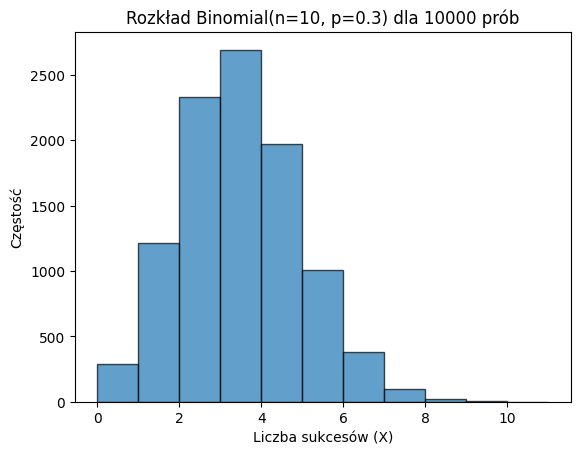

In [ ]:
n = 10
p = 0.3
size = 10000 

data = np.random.binomial(n, p, size)

total_successes = np.sum(data)
trials_total = n * size 

p_hat = total_successes / trials_total
print(f"Szacowane p-hat: {p_hat:.4f}")

alpha = 0.05 

ci_low, ci_high = proportion_confint(
    count=total_successes,
    nobs=trials_total,
    alpha=alpha,
    method='wilson' 
)

print(f"Przedział ufności (metoda Wilsona, 95%): [{ci_low:.4f}, {ci_high:.4f}]")

plt.hist(data, bins=range(n+2), alpha=0.7, edgecolor='black')
plt.xlabel("Liczba sukcesów (X)")
plt.ylabel("Częstość")
plt.title(f"Rozkład Binomial(n={n}, p={p}) dla {size} prób")
plt.show()


Widzimy, że funkcje do generowania rozkładu oraz do tworzenia przedziału ufności, działają prawidłowo i dostarczają poprawne wyniki.

___
## Zadanie 9
W zadaniu przeprowadziliśmy symulację porównującą trzy różne metody wyznaczania przedziałów ufności dla parametru $ p $ w rozkładzie dwumianowym: przedział Cloppera-Pearsona, Wald i Wilson. Celem było sprawdzenie, która z tych metod charakteryzuje się najlepszym prawdopodobieństwem pokrycia oraz najkrótszymi przedziałami ufności w zależności od rozmiaru próby $ n $ (w trzech wariantach: 30, 100 i 1000) oraz wartości $ p $ (0.1, 0.5 i 0.9).

Wyniki symulacji zostały zaprezentowane na wykresach, które pokazują zarówno prawdopodobieństwo pokrycia, jak i długość przedziału ufności dla każdej z metod. Prawdopodobieństwo pokrycia wskazuje, jak często prawdziwa wartość parametru $ p $ mieściła się w obliczonym przedziale, natomiast długość przedziału pokazuje, jak szerokie były te przedziały w różnych przypadkach.

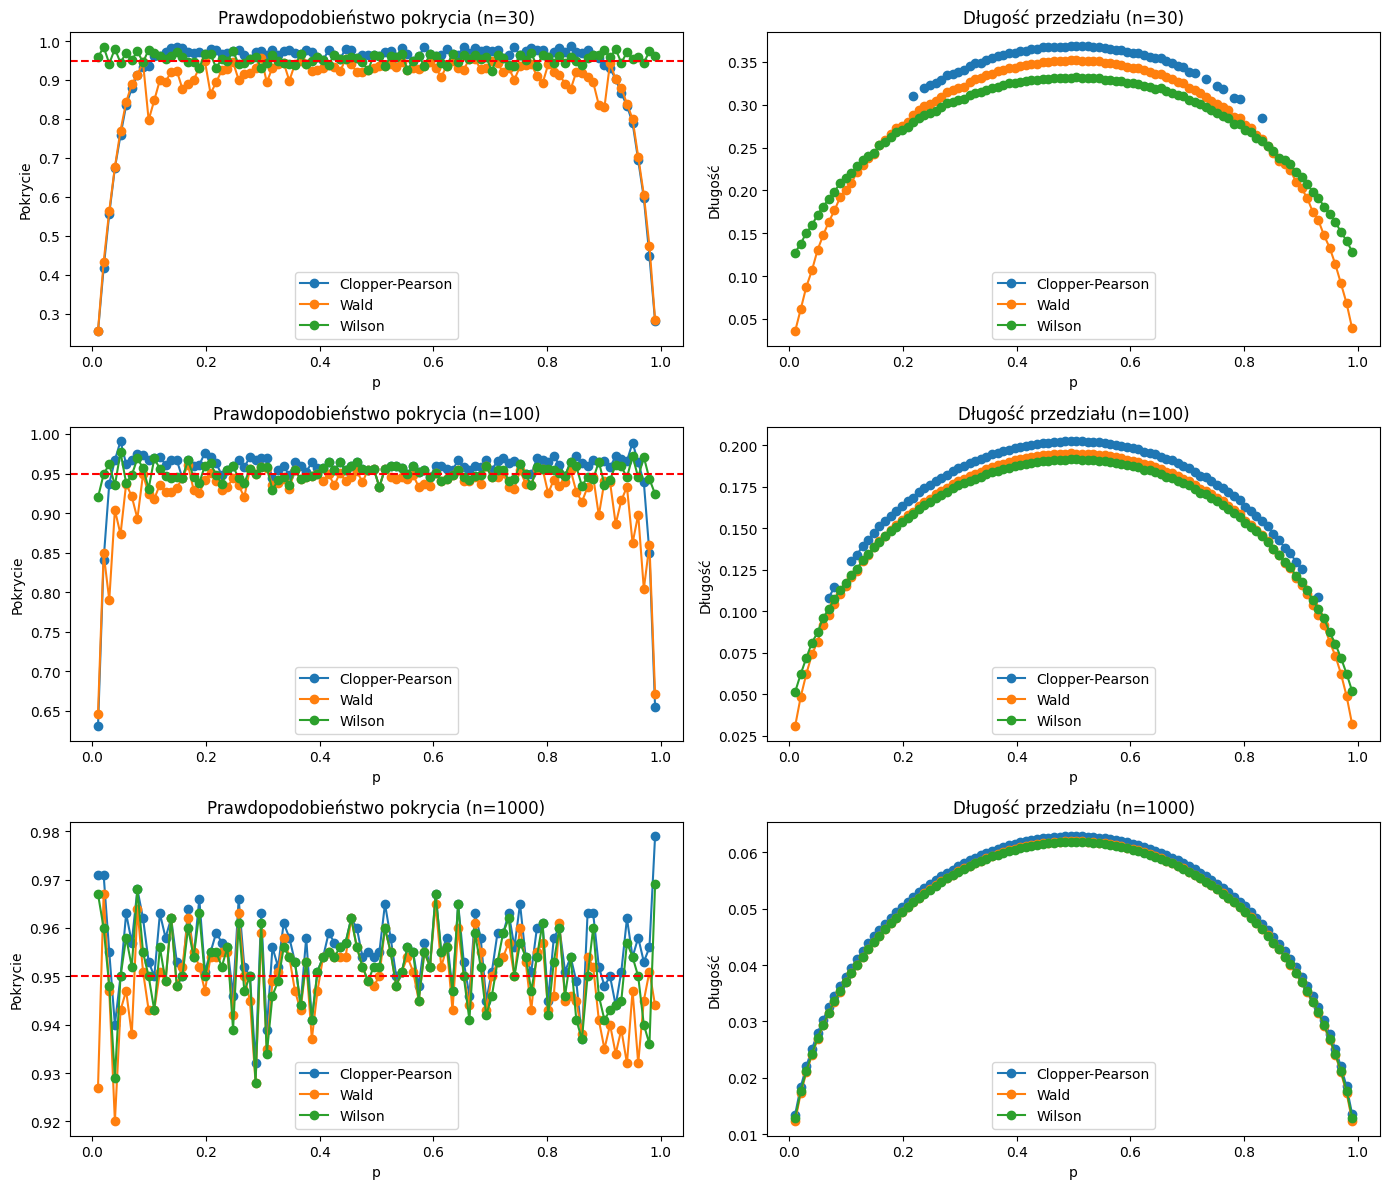

In [2]:
def clopper_pearson_confidence_interval(alpha, successes=None, trials=None, data=None):
    if data is not None:
        successes = np.sum(data)
        trials = len(data)
    
    if (successes is None or trials is None) and data is None:
        raise ValueError("Należy podać albo (successes, trials), albo wektor data.")
    
    lower_bound = stats.beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper_bound = stats.beta.ppf(1 - alpha / 2, successes + 1, trials - successes)
    
    return float(lower_bound), float(upper_bound)

def wald_confidence_interval(alpha, successes, trials):
    p_hat = successes / trials
    z = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z * np.sqrt(p_hat * (1 - p_hat) / trials)
    lower_bound = p_hat - margin_of_error
    upper_bound = p_hat + margin_of_error
    return lower_bound, upper_bound

def wilson_confidence_interval(alpha, successes, trials):
    p_hat = successes / trials
    z = stats.norm.ppf(1 - alpha / 2)
    denominator = 1 + z**2 / trials
    centre_adjusted_probability = p_hat + z**2 / (2*trials)
    adjusted_std = np.sqrt(p_hat*(1 - p_hat)/trials + z**2/(4*trials**2))
    lower_bound = (centre_adjusted_probability - z * adjusted_std) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_std) / denominator
    return lower_bound, upper_bound

alpha = 0.05
n_values = [30, 100, 1000]
p_values = np.linspace(0.01, 0.99, 100)
iterations = 1000

coverage_clopper = np.zeros((len(n_values), len(p_values)))
coverage_wald    = np.zeros((len(n_values), len(p_values)))
coverage_wilson  = np.zeros((len(n_values), len(p_values)))

length_clopper = np.zeros((len(n_values), len(p_values)))
length_wald    = np.zeros((len(n_values), len(p_values)))
length_wilson  = np.zeros((len(n_values), len(p_values)))

for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        cover_c = 0
        cover_w = 0
        cover_ws = 0
        
        len_c = 0
        len_w = 0
        len_ws = 0
        
        for _ in range(iterations):
            successes = np.random.binomial(n, p)
            
            # Clopper-Pearson
            lc, uc = clopper_pearson_confidence_interval(alpha, successes, n)
            cover_c += (lc <= p <= uc)
            len_c   += (uc - lc)
            
            # Wald
            lw, uw = wald_confidence_interval(alpha, successes, n)
            cover_w += (lw <= p <= uw)
            len_w   += (uw - lw)
            
            # Wilson
            lws, uws = wilson_confidence_interval(alpha, successes, n)
            cover_ws += (lws <= p <= uws)
            len_ws   += (uws - lws)
        
        coverage_clopper[i, j] = cover_c / iterations
        coverage_wald[i, j]    = cover_w / iterations
        coverage_wilson[i, j]  = cover_ws / iterations
        
        length_clopper[i, j] = len_c / iterations
        length_wald[i, j]    = len_w / iterations
        length_wilson[i, j]  = len_ws / iterations

plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
plt.plot(p_values, coverage_clopper[0, :], marker='o', label='Clopper-Pearson')
plt.plot(p_values, coverage_wald[0, :],    marker='o', label='Wald')
plt.plot(p_values, coverage_wilson[0, :],  marker='o', label='Wilson')
plt.axhline(0.95, color='red', linestyle='--')
plt.title("Prawdopodobieństwo pokrycia (n=30)")
plt.xlabel("p")
plt.ylabel("Pokrycie")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(p_values, length_clopper[0, :], marker='o', label='Clopper-Pearson')
plt.plot(p_values, length_wald[0, :],    marker='o', label='Wald')
plt.plot(p_values, length_wilson[0, :],  marker='o', label='Wilson')
plt.title("Długość przedziału (n=30)")
plt.xlabel("p")
plt.ylabel("Długość")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(p_values, coverage_clopper[1, :], marker='o', label='Clopper-Pearson')
plt.plot(p_values, coverage_wald[1, :],    marker='o', label='Wald')
plt.plot(p_values, coverage_wilson[1, :],  marker='o', label='Wilson')
plt.axhline(0.95, color='red', linestyle='--')  
plt.title("Prawdopodobieństwo pokrycia (n=100)")
plt.xlabel("p")
plt.ylabel("Pokrycie")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(p_values, length_clopper[1, :], marker='o', label='Clopper-Pearson')
plt.plot(p_values, length_wald[1, :],    marker='o', label='Wald')
plt.plot(p_values, length_wilson[1, :],  marker='o', label='Wilson')
plt.title("Długość przedziału (n=100)")
plt.xlabel("p")
plt.ylabel("Długość")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(p_values, coverage_clopper[2, :], marker='o', label='Clopper-Pearson')
plt.plot(p_values, coverage_wald[2, :],    marker='o', label='Wald')
plt.plot(p_values, coverage_wilson[2, :],  marker='o', label='Wilson')
plt.axhline(0.95, color='red', linestyle='--')  
plt.title("Prawdopodobieństwo pokrycia (n=1000)")
plt.xlabel("p")
plt.ylabel("Pokrycie")
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(p_values, length_clopper[2, :], marker='o', label='Clopper-Pearson')
plt.plot(p_values, length_wald[2, :],    marker='o', label='Wald')
plt.plot(p_values, length_wilson[2, :],  marker='o', label='Wilson')
plt.title("Długość przedziału (n=1000)")
plt.xlabel("p")
plt.ylabel("Długość")
plt.legend()

plt.tight_layout()
plt.show()

Wyniki symulacji pokazują, że przedział Cloppera-Pearsona zapewnia najwyższe (choć nie zawsze przekraczające 95%) prawdopodobieństwo pokrycia kosztem najdłuższego przedziału. Przedział Walda ma zwykle najwyższy rozstęp, ale w niektórych przypadkach (zwłaszcza przy małych $n$ lub $p$ zbliżonym do 0 czy 1) jego pokrycie może spaść poniżej 95%. Metoda Wilson oferuje kompromis — daje stosunkowo dobre pokrycie przy krótszym przedziale niż Clopper-Pearson, co czyni ją często lepszym wyborem niż Wald, zwłaszcza dla umiarkowanych rozmiarów prób i wartości $p$.

W praktyce, jeśli priorytetem jest pewność wysokiego pokrycia, warto wybrać Clopper-Pearsona; jeśli najważniejsza jest niewielka długość przedziału i duża próba, użyteczny może okazać się Wald, zaś w większości pozostałych sytuacji rozsądnym wyborem jest metoda Wilson.


# Część 5
## Zadanie 10

In [3]:
# Załóżmy, że mamy dane z pewnego eksperymentu:
# Chcemy zweryfikować hipotezę H0: p = 0.5 przeciwko H1: p ≠ 0.5

n = 80
k = 45
p0 = 0.5  # wartość hipotezy zerowej

# --- 1) Test dokładny binomialny (scipy.stats.binomtest) ---
result_binomtest = stats.binomtest(k=k, n=n, p=p0, alternative='two-sided')
print("=== Test dokładny binomialny (binomtest) ===")
print(f"Liczba sukcesów = {k}, liczba prób = {n}, p0 = {p0}")
print("Statystyka (w sensie: 'statistic'):", result_binomtest.statistic)
print("p-wartość:", result_binomtest.pvalue)
print("")

# --- 2) Test asymptotyczny (proportions_ztest) z biblioteki statsmodels ---
# proportions_ztest wymaga: count (liczba sukcesów), nobs (liczba prób), value (p0)
count = k
nobs = n
stat, pval = proportions_ztest(count, nobs, value=p0, alternative='two-sided')

print("=== Test asymptotyczny (proportions_ztest) ===")
print(f"Liczba sukcesów = {k}, liczba prób = {n}, p0 = {p0}")
print("Statystyka Z:", stat)
print("p-wartość:", pval)

=== Test dokładny binomialny (binomtest) ===
Liczba sukcesów = 45, liczba prób = 80, p0 = 0.5
Statystyka (w sensie: 'statistic'): 0.5625
p-wartość: 0.31430657986393706

=== Test asymptotyczny (proportions_ztest) ===
Liczba sukcesów = 45, liczba prób = 80, p0 = 0.5
Statystyka Z: 1.126872339638022
p-wartość: 0.25979645967794185
